> data taken from: https://data.gov.in/resource/india-districts-factsheets-national-family-health-survey-nfhs-5-2019-2021

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("NFHS_5_India_Districts_Factsheet_Data.csv")
print(df.head())

            District Names                   State/UT  \
0                 Nicobars  Andaman & Nicobar Islands   
1  North & Middle Andaman   Andaman & Nicobar Islands   
2           South Andaman   Andaman & Nicobar Islands   
3              Srikakulam              Andhra Pradesh   
4            Vizianagaram              Andhra Pradesh   

   Number of Households surveyed  Number of Women age 15-49 years interviewed  \
0                          882.0                                        764.0   
1                          874.0                                        789.0   
2                          868.0                                        844.0   
3                          874.0                                        780.0   
4                          902.0                                        853.0   

   Number of Men age 15-54 years interviewed  \
0                                      125.0   
1                                      108.0   
2                         

In [2]:
statesfreq=df["State/UT"].value_counts().to_list()
print(statesfreq)
states=df["State/UT"].value_counts().keys().to_list()
print(states)

[75, 50, 38, 36, 33, 33, 33, 31, 30, 30, 30, 27, 24, 22, 22, 20, 20, 20, 14, 13, 13, 12, 11, 11, 11, 9, 8, 8, 4, 4, 3, 3, 2, 2, 1, 1]
['Uttar Pradesh', 'Madhya Pradesh', 'Bihar', 'Maharastra', 'Assam', 'Rajasthan', 'Gujarat', 'Telangana', 'Tamil Nadu', 'Odisha', 'Karnataka', 'Chhattisgarh', 'Jharkhand', 'Haryana', 'Punjab', 'West Bengal', 'Jammu & Kashmir', 'Arunachal Pradesh', 'Kerala', 'Andhra Pradesh', 'Uttarakhand', 'Himachal Pradesh', 'Meghalaya', 'Nagaland', 'NCT of Delhi', 'Manipur', 'Tripura', 'Mizoram', 'Puducherry', 'Sikkim', 'Andaman & Nicobar Islands', 'Dadra and Nagar Haveli & Daman and Diu', 'Goa', 'Ladakh', 'Chandigarh', ' Lakshadweep ']


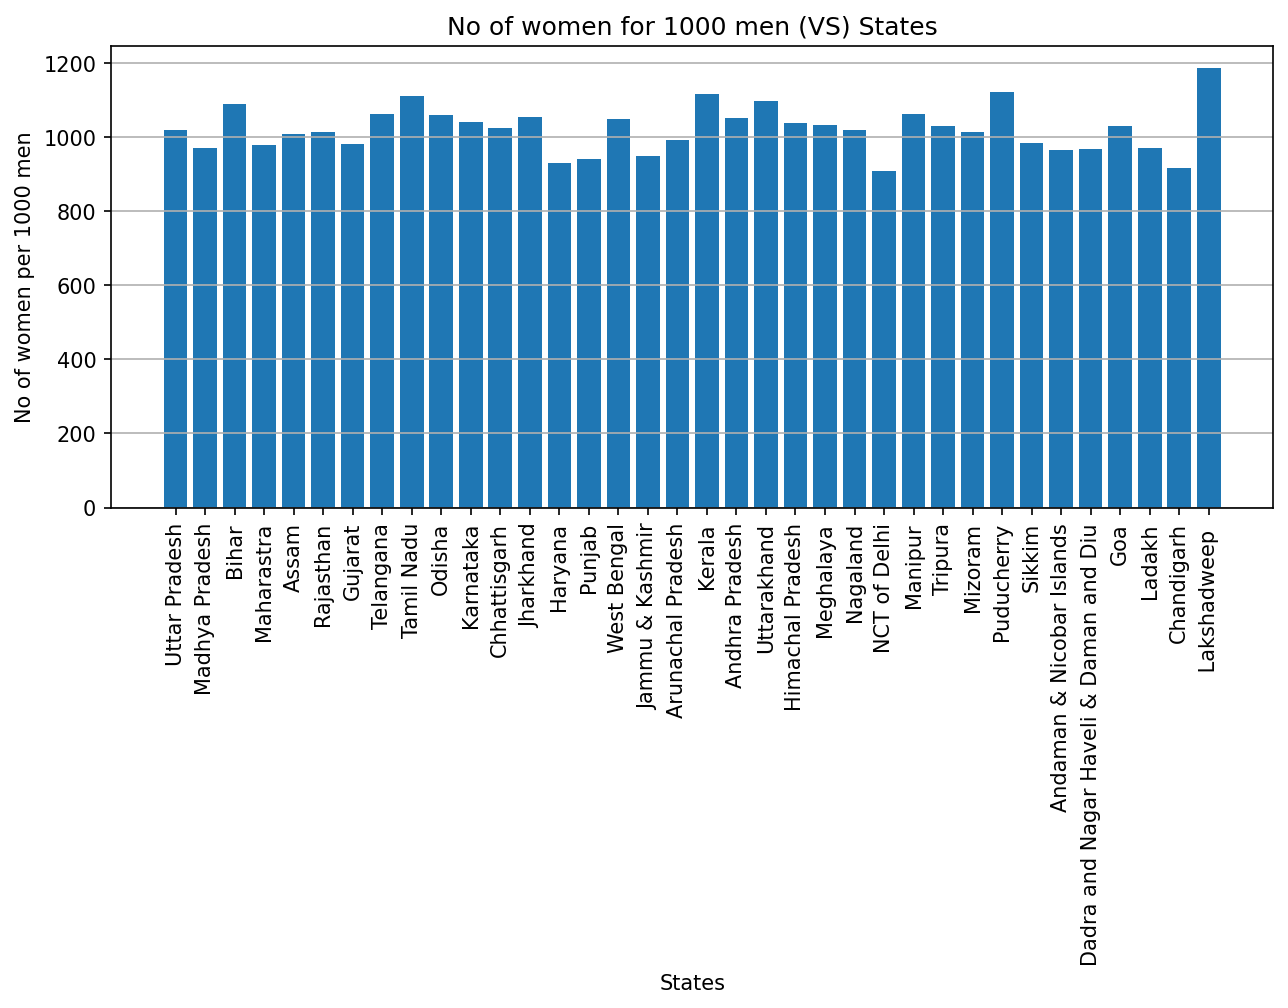

In [3]:
sumlist=[]
averagelist=[]
wlitlist=[]
wemarrlist=[]
electricitylist=[]
for i,l in enumerate(states):
    #print(l)
    df_state=df[df["State/UT"]==l]
    #print(df_state.columns)
    sum=df_state[' Sex ratio of the total population (females per 1,000 males)'].sum()
    wlitsum=df_state['Women (age 15-49) who are literate4 (%)'].sum()
    wemarr=df_state['Women age 20-24 years married before age 18 years (%)'].sum()
    electricity=df_state['Population living in households with electricity (%)'].sum()
    #print(sum)
    #sumlist.append(sum)
    averagelist.append(sum/statesfreq[i])
    wlitlist.append(wlitsum/statesfreq[i])
    wemarrlist.append(wemarr/statesfreq[i])
    electricitylist.append(electricity/statesfreq[i]) 
# print(sumlist)
# print(averagelist)
plt.figure(figsize=(10,4),dpi=150)
plt.bar(states,averagelist)
plt.title("No of women for 1000 men (VS) States")
plt.xticks(states,rotation=90)
plt.ylabel('No of women per 1000 men')
plt.xlabel('States')
plt.grid(axis='y')

In [4]:
lessstates=[]
arraveragelist=np.array(averagelist)
k=np.mean(arraveragelist)
for i,l in enumerate(states):
    if averagelist[i]<k:
        lessstates.append(l)
print(lessstates)

['Uttar Pradesh', 'Madhya Pradesh', 'Maharastra', 'Assam', 'Rajasthan', 'Gujarat', 'Haryana', 'Punjab', 'Jammu & Kashmir', 'Arunachal Pradesh', 'Nagaland', 'NCT of Delhi', 'Mizoram', 'Sikkim', 'Andaman & Nicobar Islands', 'Dadra and Nagar Haveli & Daman and Diu', 'Ladakh', 'Chandigarh']


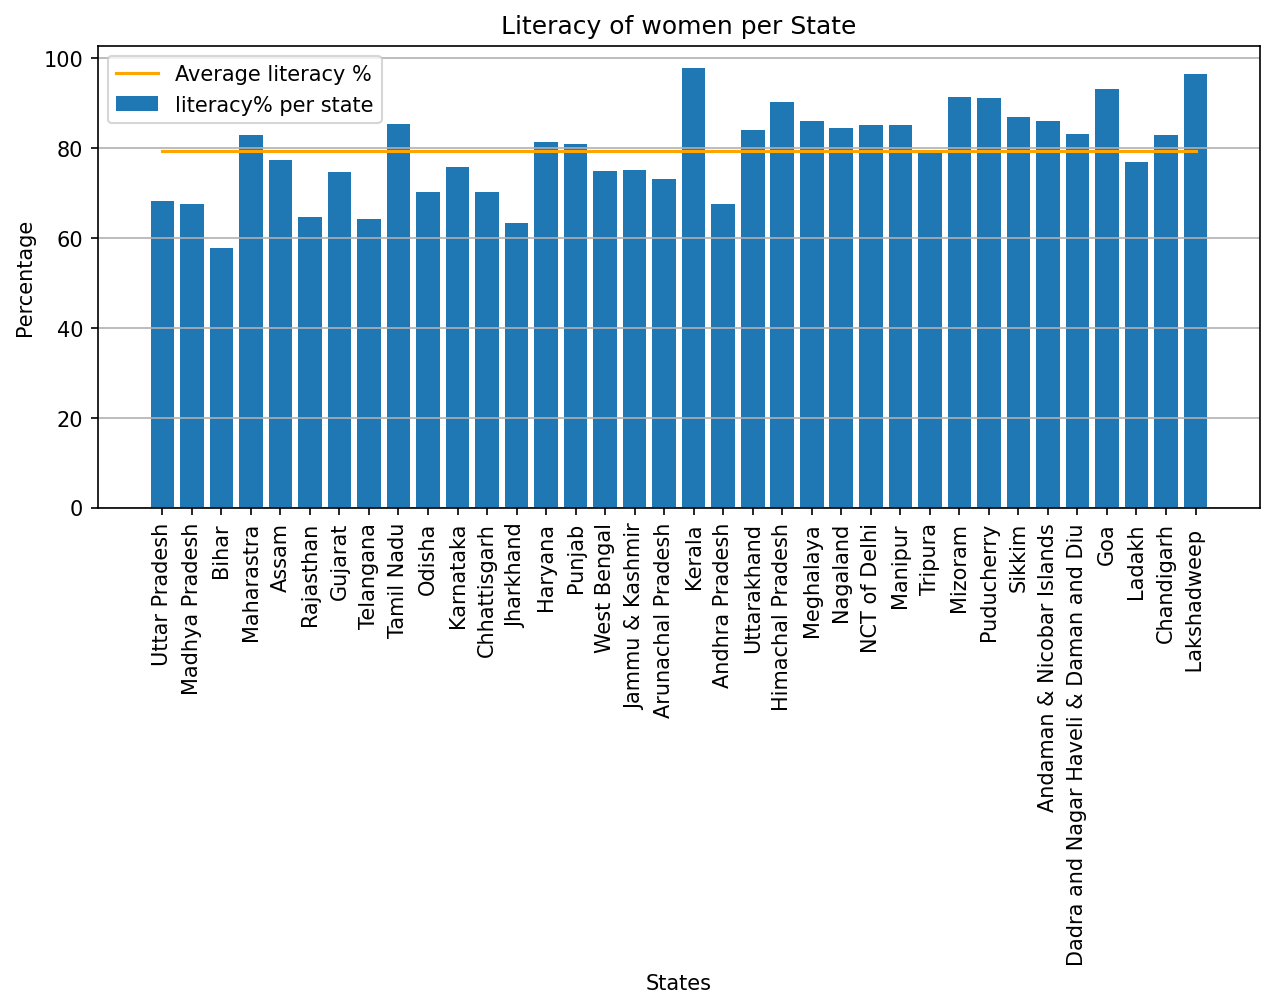

In [5]:
#litwomen=df["Women (age 15-49) who are literate4 (%)"].vlaue_counts().keys().to_list()
#srchilden=df[]
k=[np.mean(wlitlist)]*len(wlitlist)
plt.figure(figsize=(10,4),dpi=150)
plt.bar(states,wlitlist,label='literacy% per state')
plt.plot(states,k,color='orange',label='Average literacy %')
plt.title("Literacy of women per State")
plt.legend(loc=0)
plt.ylabel('Percentage')
plt.xlabel('States')
plt.xticks(states,rotation=90)
plt.grid(axis='y')

In [6]:
litstates=[]
goodlitstates=[]
arrwlitlist=np.array(wlitlist)
k=np.mean(arrwlitlist)
for i,l in enumerate(states):
    if wlitlist[i]<k:
        litstates.append(l)
    else:
        goodlitstates.append(l)
print(litstates)

['Uttar Pradesh', 'Madhya Pradesh', 'Bihar', 'Assam', 'Rajasthan', 'Gujarat', 'Telangana', 'Odisha', 'Karnataka', 'Chhattisgarh', 'Jharkhand', 'West Bengal', 'Jammu & Kashmir', 'Arunachal Pradesh', 'Andhra Pradesh', 'Ladakh']


In [7]:
for i in range(len(lessstates)):
    for j in range(len(litstates)):
        if lessstates[i]==litstates[j]:
            print(litstates[j])
print(len(lessstates),len(litstates))

Uttar Pradesh
Madhya Pradesh
Assam
Rajasthan
Gujarat
Jammu & Kashmir
Arunachal Pradesh
Ladakh
18 16


__It is seen in above two plots that, 50% of the states which are having less than average literate women are also having__
__are also having less than average sex ratio taken as number of women for 1000 men.__
__This shows that women survival rate is less among societies which have less means of developement for women.__



Text(0, 0.5, '% women married Underage')

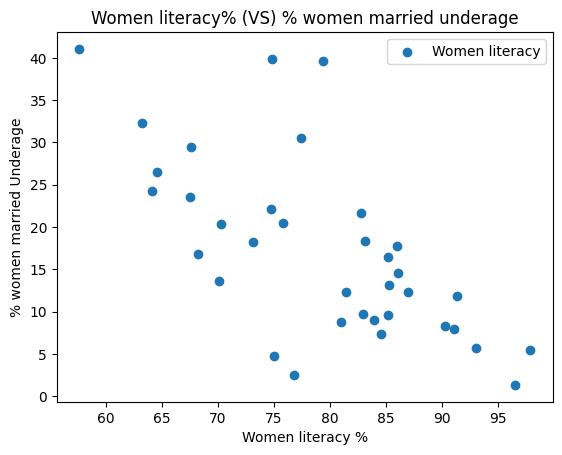

In [8]:
#scatterwlit=df['Women (age 15-49) who are literate4 (%)'].value_counts().keys().to_list()
#scatteremarr=df['Women age 20-24 years married before age 18 years (%)'].value_counts().keys().to_list()
plt.scatter(wlitlist,wemarrlist,label='Women literacy')
plt.title('Women literacy% (VS) % women married underage')
plt.legend(loc=0)
plt.xlabel('Women literacy %')
plt.ylabel('% women married Underage')
# print(len(wlitlist),len(wemarrlist))
# print(wlitlist,wemarrlist)
#plt.scatter(scatterwlit,scatteremarr)

__As it is clearly show in the scatter plot we see that as the percentage of women being literate increases in the states
percentage of women being married of early before the age of 18 years in decreasing, again emphasising the importance of 
women education and how essential it is to have a just society for them.__

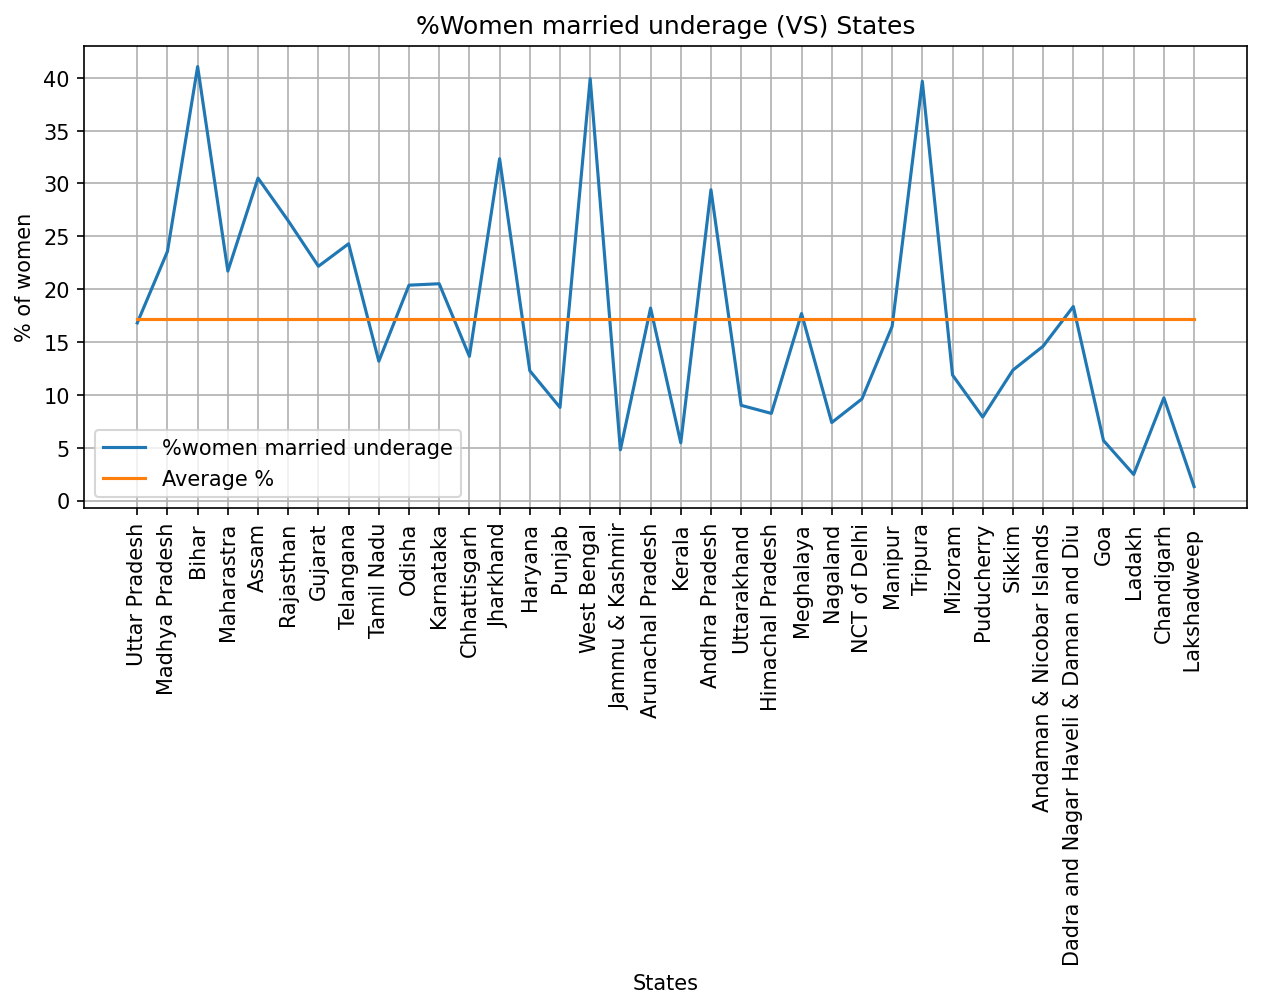

In [9]:
l=[np.mean(wemarrlist)]*len(wemarrlist)
plt.figure(figsize=(10,4),dpi=150)
plt.plot(states,wemarrlist,label='%women married underage')
plt.plot(states,l,label='Average %')
plt.xticks(states,rotation=90)
plt.legend(loc=0)
plt.xlabel('States')
plt.ylabel('% of women')
plt.title("%Women married underage (VS) States")
plt.grid()

__The above line plot gives the percentage of women married early befor the age of 18, with respect to different states.
It shows the states which are above and below the average percentage showing states which need more effort in women education__

Text(0.5, 0, 'Percentile of percentages of children going to primary')

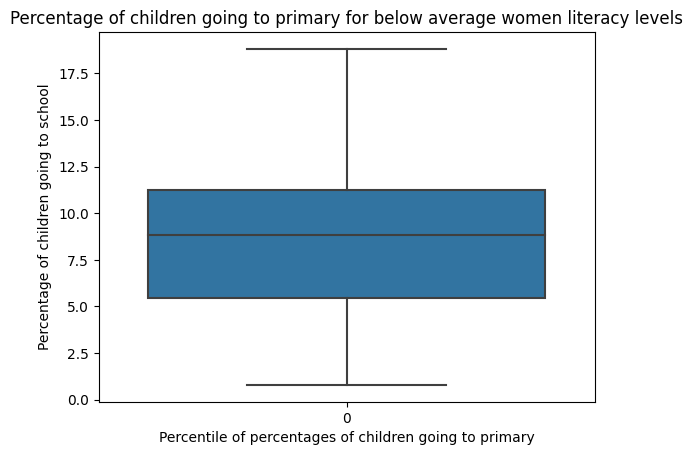

In [10]:
childlitlist=[]
df["Children age 5 years who attended pre-primary school during the school year 2019-20 (%)"].astype(int)
for x in litstates:
    df_violin=df[df["State/UT"]==x]
    sum=df_violin["Children age 5 years who attended pre-primary school during the school year 2019-20 (%)"].sum()
    freq=df_violin["State/UT"].value_counts().to_list()
    #print(sum)
    average=sum/int(freq[0])
    childlitlist.append(average)
childgoodlitlist=[]
for x in goodlitstates:
    df_violin2=df[df["State/UT"]==x]
    sum=df_violin2["Children age 5 years who attended pre-primary school during the school year 2019-20 (%)"].sum()
    freq=df_violin2["State/UT"].value_counts().to_list()
    average=sum/int(freq[0])
    childgoodlitlist.append(average)
sns.boxplot(childlitlist)
plt.title("Percentage of children going to primary for below average women literacy levels")
plt.ylabel('Percentage of children going to school')
plt.xlabel('Percentile of percentages of children going to primary')


Text(0.5, 0, 'Percentile of percentages of children going to primary')

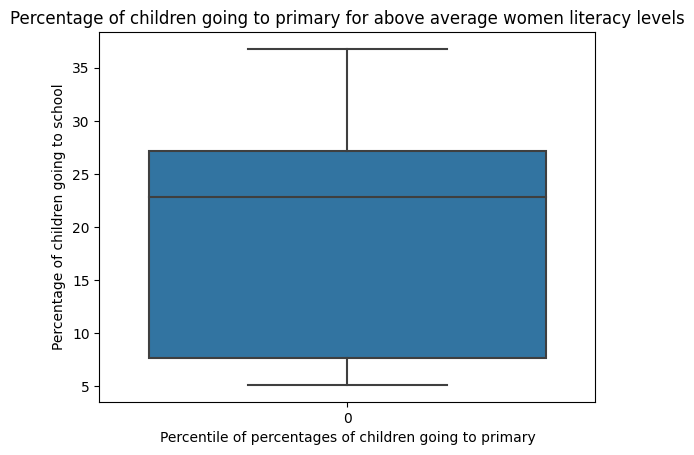

In [11]:
sns.boxplot(childgoodlitlist)
plt.title("Percentage of children going to primary for above average women literacy levels")
plt.ylabel('Percentage of children going to school')
plt.xlabel('Percentile of percentages of children going to primary')

__We can clearly see in these box plots that states which are having women literacy above average (i.e.,states in childgoodlitlist) are also having higher percentages of children attending primary schools when compared to states having women literacy below average. This further upholds the fact that women when are literate also send their children to school__

Text(0.5, 1.05, 'Pair Plot')

<Figure size 8000x4800 with 0 Axes>

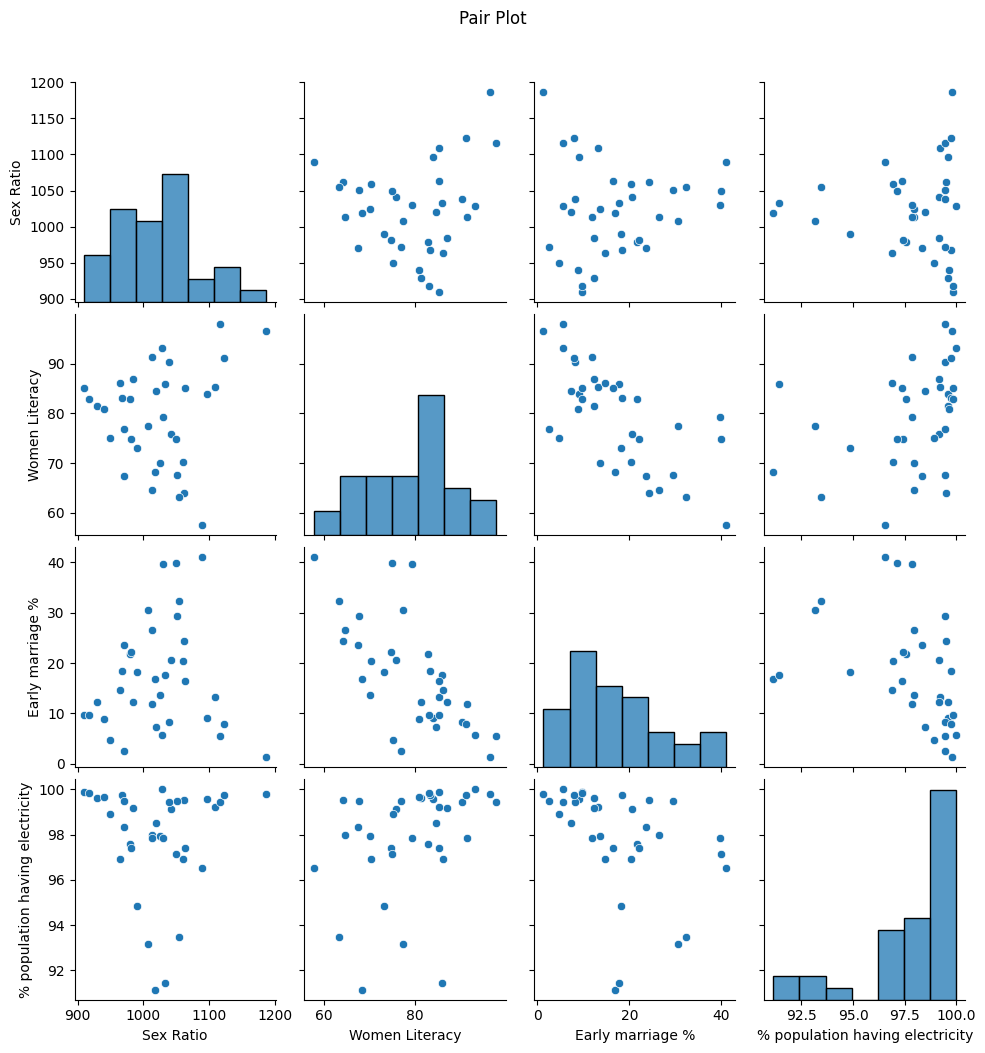

In [12]:
dic={}
dictVal = {'fontsize': 60,
 'fontweight': 'normal',
 'color': 'k',
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
dic['Sex Ratio']=averagelist
dic['Women Literacy']=wlitlist
dic['Early marriage %']=wemarrlist
dic['% population having electricity']=electricitylist
df_pair2=pd.DataFrame(dic)
plt.figure(figsize=(40,24),dpi=200)
sns.pairplot(df_pair2)
plt.suptitle('Pair Plot',y=1.05)



__The pair plots taken for various values above are used to see the correlation between eachother to see if factors like developement, women literacy, sex ratio, early marriage% are inter-related.__

__As seen above it doesn't seem like electricity has a great effect of any other parameters except women literacy.__

__For early marriage parameter, we see that it has a stron negarive correlation with women literacy and then we see it doesn't have stron correlation to sex ratio seen in the communities, early marriages are occuring irrespective of sex ratio prevelant.__

__Women Literacy seems to have a positive correlation with % population having electricity and a strong negative correlation with early marriage % . Women Literacy has a parabolic relation with sex ration plot as shown above.__

__Sex Raio seems to remain constant with any change in %population having electricity and early marriage %, with a parabolic relationship with women literacy__